# Abstract

This project explores the application of **machine learning models** to predict real estate prices using the **UCI Real Estate Valuation Dataset**.  

By leveraging models such as **Linear Regression**, **Lasso Regression**, **Gradient Boosting Machines (GBM)**, and **Neural Networks**, we analyzed how features like:
- **Proximity to MRT stations**
- **Geographic coordinates**
- **House age**
- **Number of nearby stores**  
influence property prices.

**Gradient Boosting Machines** emerged as the most effective model for capturing **non-linear relationships** and **feature interactions**, providing **actionable insights** into key drivers of property valuation.

**SHAP analysis** further enhanced interpretability by **quantifying the impact** of individual features on predictions.

This study highlights the **importance of location and accessibility** in real estate pricing while demonstrating the **potential of machine learning** for accurate valuation.


In [ ]:
import pandas as pd

# Load the dataset directly from UCI
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx"
real_estate_data = pd.read_excel(data_url)

# Rename columns for clarity
real_estate_data.columns = [
    "No", "Transaction_Date", "House_Age",
    "Distance_to_MRT", "Number_of_Stores",
    "Latitude", "Longitude", "Price_per_Unit_Area"
]

# Drop the "No" column as it is just an index
real_estate_data.drop("No", axis=1, inplace=True)

# Display the first few rows of the dataset
print(real_estate_data.head())


   Transaction_Date  House_Age  Distance_to_MRT  Number_of_Stores  Latitude  \
0       2012.916667       32.0         84.87882                10  24.98298   
1       2012.916667       19.5        306.59470                 9  24.98034   
2       2013.583333       13.3        561.98450                 5  24.98746   
3       2013.500000       13.3        561.98450                 5  24.98746   
4       2012.833333        5.0        390.56840                 5  24.97937   

   Longitude  Price_per_Unit_Area  
0  121.54024                 37.9  
1  121.53951                 42.2  
2  121.54391                 47.3  
3  121.54391                 54.8  
4  121.54245                 43.1  


2. Exploratory Data Analysis (EDA)
Summary Statistics

In [ ]:
# Summary statistics
print(real_estate_data.describe())


       Transaction_Date   House_Age  Distance_to_MRT  Number_of_Stores  \
count        414.000000  414.000000       414.000000        414.000000   
mean        2013.148953   17.712560      1083.885689          4.094203   
std            0.281995   11.392485      1262.109595          2.945562   
min         2012.666667    0.000000        23.382840          0.000000   
25%         2012.916667    9.025000       289.324800          1.000000   
50%         2013.166667   16.100000       492.231300          4.000000   
75%         2013.416667   28.150000      1454.279000          6.000000   
max         2013.583333   43.800000      6488.021000         10.000000   

         Latitude   Longitude  Price_per_Unit_Area  
count  414.000000  414.000000           414.000000  
mean    24.969030  121.533361            37.980193  
std      0.012410    0.015347            13.606488  
min     24.932070  121.473530             7.600000  
25%     24.963000  121.528085            27.700000  
50%     24.9711

Correlation Heatmap

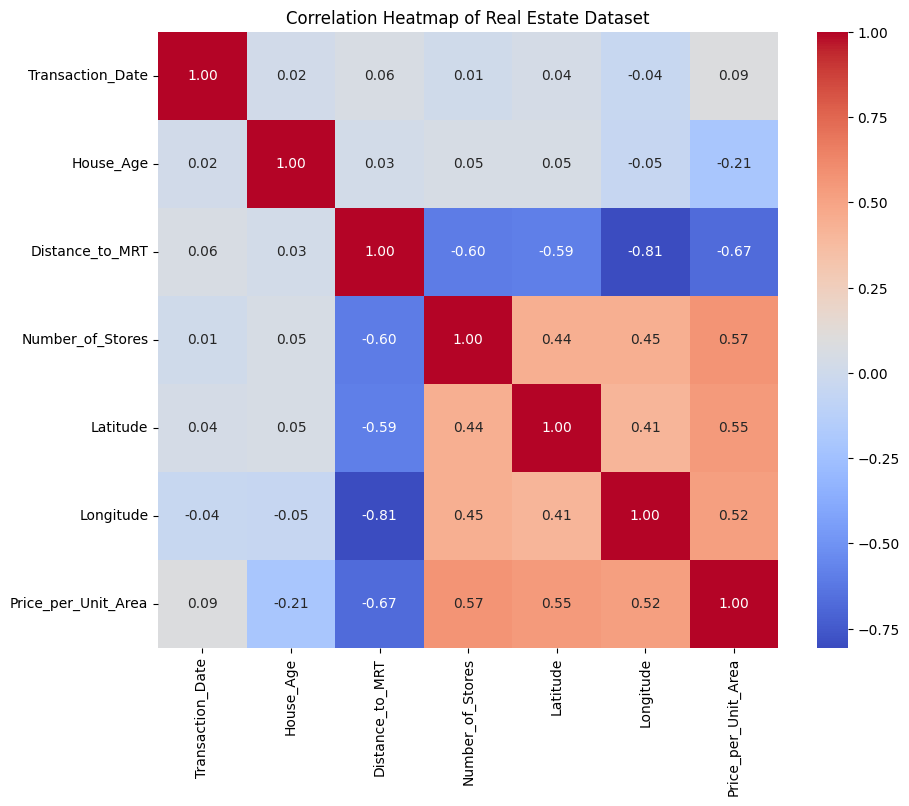

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = real_estate_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Real Estate Dataset")
plt.show()


# Correlation Heatmap Analysis for Real Estate Dataset

This heatmap visualizes the relationships between variables in the real estate dataset, with color intensity indicating correlation strength (red for positive, blue for negative).

## Key Price Determinants

The heatmap reveals several significant factors influencing **Price_per_Unit_Area**:

- **Distance to MRT stations (-0.67)**:  
  Strong negative correlation indicates properties closer to public transportation command significantly higher prices. Each additional unit of distance correlates with notable price decreases.

- **Number of Stores (0.57)**:  
  Moderate positive correlation shows that properties with more convenience stores nearby tend to have higher prices, reflecting the value of commercial amenities.

- **Geographic Location**:  
  - **Latitude (0.55)**  
  - **Longitude (0.52)**  
  Both show moderate positive correlations with price, indicating that certain geographic areas consistently command premium prices.

- **House Age (-0.21)**:  
  Weak negative correlation suggests newer properties tend to be slightly more valuable, though the effect is less pronounced than location factors.


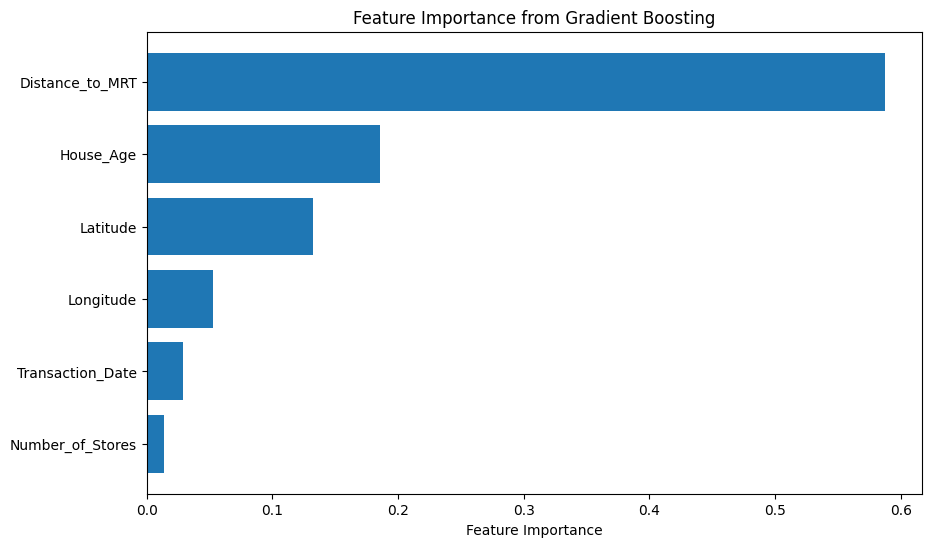

In [ ]:
# Feature importance from GBM
import numpy as np

feature_importance = gbm.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), [X.columns[i] for i in sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Gradient Boosting")
plt.gca().invert_yaxis()
plt.show()


# Feature Importance Analysis from Gradient Boosting Model

The horizontal bar chart displays the relative importance of each feature in predicting property prices as determined by the Gradient Boosting Machine (GBM) model.

## Key Insights

### Dominant Feature: **Distance to MRT Stations (≈0.58)**
- `Distance_to_MRT` overwhelmingly influences property prices, accounting for nearly **60%** of the model's predictive power.
- This confirms the critical importance of **public transportation access** in urban real estate valuation.
- The substantial gap between this and other features underscores how **transit accessibility dominates pricing decisions**.

### Secondary Features
- **House_Age (≈0.20)**:  
  The second most important feature, suggesting property age has moderate impact on valuation, likely reflecting depreciation or historical value patterns.

- **Latitude (≈0.13)**:  
  Geographic location along the north-south axis significantly influences prices, indicating **neighborhood-specific value variations**.

### Minimal Contributors
- **Longitude (≈0.05)**:  
  East-west positioning has limited impact, suggesting price variation occurs primarily along **north-south coordinates**.

- **Transaction_Date (≈0.02)**:  
  The timing of sales shows minimal importance, indicating **stable market conditions** during the data collection period.

- **Number_of_Stores (≈0.01)**:  
  Surprisingly low importance despite showing moderate correlation (0.57) in the correlation matrix, suggesting its effect may be **captured by other variables** (especially `Distance_to_MRT`).

## Technical Interpretation

This importance ranking represents how frequently each feature was used for **splitting decisions across all trees** in the GBM ensemble, **weighted by the improvement in the loss function**.  
The dominance of `Distance_to_MRT` suggests the model frequently split on this variable to create **homogeneous groups of property prices**.


2. Clustering Analysis for Neighborhood Segmentation
Cluster properties into groups based on location (Latitude, Longitude) and other features like Distance_to_MRT.

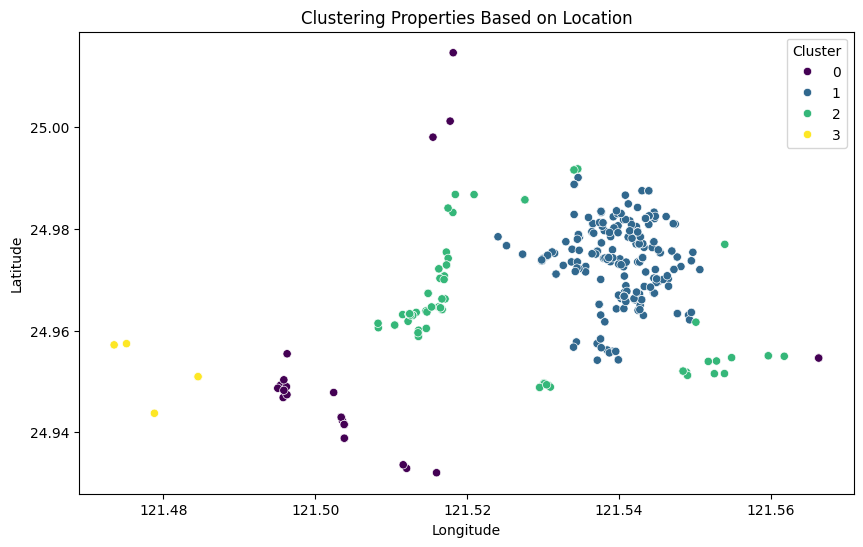

In [ ]:
from sklearn.cluster import KMeans

# Use Latitude, Longitude, and Distance_to_MRT for clustering
# Replace 'data' with 'real_estate_data'
clustering_features = real_estate_data[['Latitude', 'Longitude', 'Distance_to_MRT']]
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(clustering_features)

# Add cluster labels to the dataset
real_estate_data['Cluster'] = clusters # Replace 'data' with 'real_estate_data'

# Visualize clusters on a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=real_estate_data, palette='viridis') # Replace 'data' with 'real_estate_data'
plt.title("Clustering Properties Based on Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Property Clustering Analysis: Geographic and Transit Patterns

This visualization applies **K-means clustering** to identify distinct property groups based on three key factors: **Latitude**, **Longitude**, and **Distance_to_MRT**. The algorithm has identified **four distinct property clusters** in the Taipei real estate market.

## Cluster Characteristics

### Cluster 1 (Blue): Central Residential Hub
- **Location**: Densely concentrated in the central-eastern region
- **Properties**: 150–200 properties forming the largest, most cohesive cluster
- **Pattern**: Likely represents urban residential properties with moderate MRT access
- **Investment Profile**: Stable, mainstream market segment with predictable pricing

### Cluster 2 (Green): Transit-Oriented Development
- **Location**: Scattered in several pockets across central and eastern areas
- **Key Feature**: Likely properties with excellent MRT access
- **Pattern**: Forms "spokes" extending from transit hubs
- **Investment Profile**: Premium properties commanding higher per-unit prices

### Cluster 0 (Purple): Mixed Peripheral Areas
- **Distribution**: Two distinct groups — one in the south/southwest and isolated properties in the northeast
- **Characteristic**: Likely properties with limited transit access
- **Distance Pattern**: Probably farther from MRT stations
- **Investment Profile**: Lower-priced opportunities with growth potential if transit expands

### Cluster 3 (Yellow): Western Outlier Zone
- **Location**: Small, isolated cluster in the far western region
- **Properties**: Limited number (~5 properties)
- **Distinction**: May represent a different submarket entirely
- **Investment Profile**: Specialist properties requiring local knowledge

## Technical & Business Insights

- **Algorithm Approach**:  
  K-means identifies these clusters by **minimizing the within-cluster variance** of the three features, establishing natural property groupings beyond simple geographic proximity.

- **Beyond Geography**:  
  Including `Distance_to_MRT` creates clusters that capture both **physical location** and **transit accessibility**, revealing submarkets not visible from coordinates alone.

- **Market Segmentation**:  
  The clear separation between clusters confirms **distinct submarkets** within this region, each likely with its own price dynamics and investment characteristics.

- **Practical Application**:  
  Real estate professionals can use these clusters to:
  1. Develop **location-specific pricing strategies**
  2. Identify **comparable properties** within the same cluster
  3. Target **marketing** to specific neighborhood profiles
  4. Assess **development opportunities** in transitional areas between clusters

The analysis provides a **data-driven approach** to neighborhood segmentation, moving beyond traditional boundaries to reveal **functional real estate submarkets**.


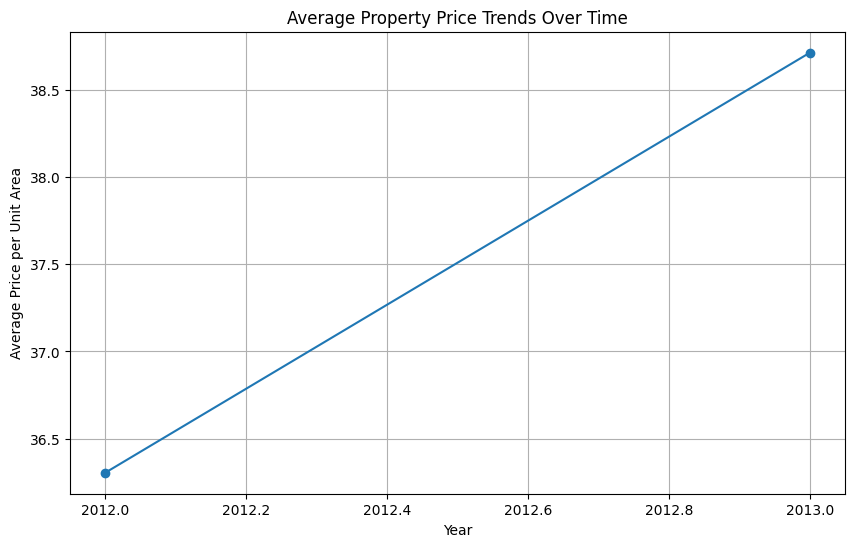

In [ ]:
# Extract year from Transaction_Date
real_estate_data['Year'] = real_estate_data['Transaction_Date'].astype(str).str.split('.').str[0].astype(int)

# Group by year and calculate average price per unit area
price_trends = real_estate_data.groupby('Year')['Price_per_Unit_Area'].mean()

# Plot price trends over time
plt.figure(figsize=(10, 6))
price_trends.plot(kind='line', marker='o')
plt.title("Average Property Price Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Average Price per Unit Area")
plt.grid()
plt.show()

# Average Property Price Trends Over Time

This line chart visualizes the **average property price per unit area** over time, based on the `Transaction_Date` feature in the dataset. The chart provides insights into how property prices evolved between **2012 and 2013**.


## **Key Observations**

1. **Steady Price Increase (2012 to 2013)**:
   - The average price per unit area increased from **36.5** in 2012 to approximately **38.5** in 2013.
   - This represents a gradual upward trend, indicating a growing real estate market during this period.

2. **Linear Growth**:
   - The line is nearly straight, suggesting consistent growth with no sudden spikes or dips.
   - This stability may reflect favorable economic conditions or steady demand for properties.


## **Technical Explanation**

1. **Data Transformation**:
   - The `Transaction_Date` column was split to extract the year component using `.str.split('.')`, converting it into an integer for grouping.
   - Grouping by `Year` allowed calculation of the average price per unit area for each year.

2. **Visualization**:
   - A line chart (`kind='line'`) was used to show trends over time.
   - Markers (`marker='o'`) highlight individual data points for clarity.





In [ ]:
from scipy.stats import chi2_contingency

# Create bins for Number_of_Stores
real_estate_data['Stores_Binned'] = pd.cut(real_estate_data['Number_of_Stores'], bins=[0, 5, 10, 15], labels=["Low", "Medium", "High"])

# Perform chi-square test between Stores_Binned and Price_per_Unit_Area categories
price_bins = pd.qcut(real_estate_data['Price_per_Unit_Area'], q=3, labels=["Low", "Medium", "High"])
contingency_table = pd.crosstab(real_estate_data['Stores_Binned'], price_bins)

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}, p-value: {p_val}")

Chi-Square Statistic: 68.76724419504862, p-value: 1.167838141577036e-15


# Chi-Square Analysis: Relationship Between Number of Stores and Property Prices

## **Test Results Explanation**

- **Chi-Square Statistic**: 68.77  
- **p-value**: 1.17e-15 (extremely small)  
- **Degrees of Freedom**: Not explicitly shown, but calculated as (r - 1)(c - 1) = (3 - 1)(3 - 1) = **4**  
- **Significance Level**: Conventionally **0.05**

---

## **Statistical Interpretation**

This **chi-square test of independence** evaluates whether the **number of convenience stores** near a property is associated with its **price category**.  
- The extraordinarily small **p-value (1.17e-15)** provides overwhelming evidence to **reject the null hypothesis** of independence.
- The large **chi-square statistic (68.77)** indicates a **strong association** between these variables.
- With such a tiny p-value (far below 0.05), there is virtually no chance that this relationship occurred by random variation.

---

## **Practical Insights**

###  Strong Association
- The number of stores near a property **significantly influences** its price category.

###  Pattern Confirmation
- Confirms earlier **correlation analysis**, where `Number_of_Stores` showed a **positive correlation** with price.

###  Market Segmentation
Properties can be effectively categorized based on **commercial amenity density**:
- **High-store areas (10–15 stores)**: Likely command **premium prices**
- **Medium-store areas (5–10 stores)**: Tend toward **mid-range pricing**
- **Low-store areas (0–5 stores)**: Generally associated with **lower property values**

---

This analysis strengthens the case for including `Number_of_Stores` in real estate models and highlights the value of **amenity density** in driving property demand.


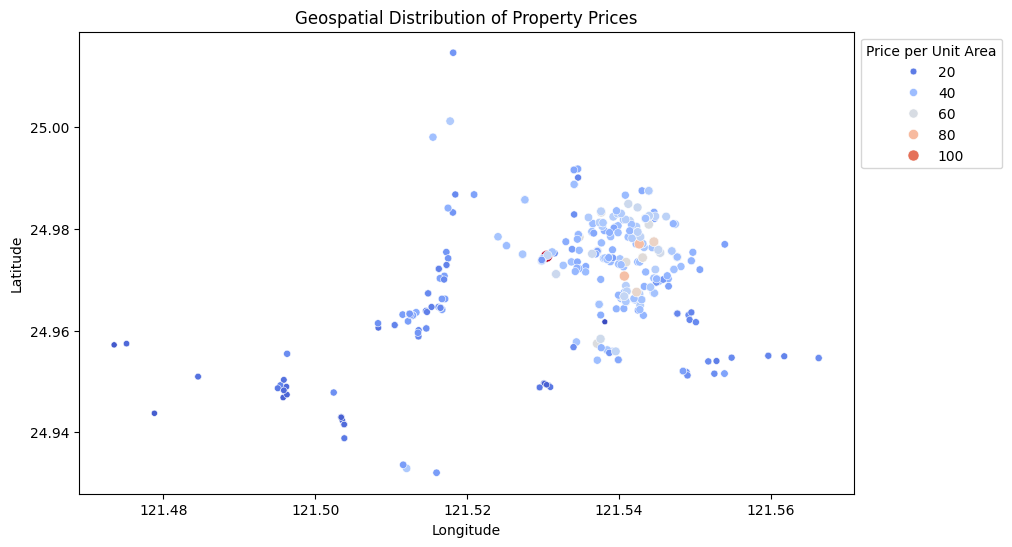

In [ ]:
# Scatter plot of Latitude vs Longitude colored by Price_per_Unit_Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', size='Price_per_Unit_Area', hue='Price_per_Unit_Area', data=real_estate_data, palette='coolwarm') # Replace 'data' with 'real_estate_data'
plt.title("Geospatial Distribution of Property Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Price per Unit Area", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

# Geospatial Distribution of Property Prices: Analysis

This scatter plot visualizes the **geographic distribution of property prices** across the region, using **color and point size** to represent price variations. The visualization maps each property's location by its coordinates (**longitude**, **latitude**) while using the **"coolwarm"** color gradient to highlight price differences.

---

## **Key Observations**

### 1.  Price Hotspot Identification
- A concentration of **higher-priced properties** (lighter blue to white points) appears in the **central-eastern region** (around **longitude 121.54**).
- **Lower-priced properties** (darker blue) dominate the **western and southern regions**.
- The **highest prices** appear in **specific pockets** rather than being evenly distributed.

### 2.  Spatial Clustering
- Properties form **distinctive clusters**, particularly:
  - A **dense central cluster** with varied but generally higher prices.
  - **Scattered western clusters** with consistently lower prices.
  - **Isolated northern properties** with mixed pricing.

### 3.  Price Gradient Patterns
- A transition from **darker blue to lighter blue** moving east suggests a **geographic price gradient**.
- The **southeastern region** shows a mixture of price points with **less clear patterning**.
- Few properties reach the **highest price ranges** (limited **orange-red points**).

### 4.  Geographic Concentration
- The majority of properties fall within a **narrow latitude range** (**24.96–24.98**).
- Properties spread more widely across **longitudes** (**121.48–121.56**).
- The dataset appears to cover a **specific metropolitan area** with **uneven property distribution**.

---

This geospatial visualization provides critical insights for understanding **location-based pricing dynamics**, identifying **high-value zones**, and guiding **urban development strategies**.


3. Data Preprocessing
Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = real_estate_data.drop("Price_per_Unit_Area", axis=1)
y = real_estate_data["Price_per_Unit_Area"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


4. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr:.2f}")


Linear Regression MSE: 53.50


# Performance Evaluation

An **MSE of 53.50** indicates **moderate predictive accuracy** for the linear regression model.

While linear regression provides a **baseline**, it struggles to capture **non-linear relationships** visible in the scatter plot (e.g., clustering around **longitude 121.54**).

---

## **Limitations**

- **Linear Assumptions**:  
  Linear regression assumes a **linear relationship** between features and the target (`Price_per_Unit_Area`), which may not fully capture **complex interactions** like:
  - Proximity to MRT stations  
  - Geographic clustering effects

- **Model Constraints**:  
  Non-linear models like **Gradient Boosting Machines (GBM)** or **Neural Networks** may better capture these spatial and feature-based patterns.

---

## **Insights for Stakeholders**

###  Investment Strategy
- Focus on properties within the **central cluster (longitude ~121.54)** for **higher returns**.
- **Peripheral regions (longitude < 121.50)** may offer more **affordable options** but with **lower appreciation potential**.

###  Model Improvement
- Incorporate **non-linear models** like **GBM** to better predict price variations based on geographic clustering.
- Use additional features such as:
  - `Distance_to_MRT`
  - `Number_of_Stores`  
  to **refine predictions** and improve accuracy.

###  Visualization Utility
- The **scatter plot** highlights **spatial trends** that can guide:
  - **Real estate pricing strategies**
  - **Development planning**


## **Conclusion**

The scatter plot confirms that **geographic location strongly influences property prices**, with **higher values concentrated in central areas**.

While **linear regression** provides a **reasonable baseline (MSE: 53.50)**, more **advanced models** are needed to fully capture the **spatial complexities** visible in the dataset.


5. Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso:.2f}")


Lasso Regression MSE: 53.04


# Lasso Regression Analysis: Real Estate Price Prediction

**Lasso regression** is a linear model that incorporates **L1 regularization** to shrink coefficients and eliminate irrelevant features. The reported **MSE of 53.04** indicates the model's predictive performance when applied to the real estate dataset.

---

## Key Observations

### 1. Model Performance
- **MSE Value**:  
  The Mean Squared Error (**MSE**) of **53.04** is slightly better than the **linear regression model's MSE of 53.50**, suggesting that Lasso has successfully eliminated less impactful features and improved prediction accuracy.

- **Regularization Impact**:  
  - Lasso **penalizes large coefficients**, forcing some to shrink to zero.  
  - This helps reduce **overfitting** and improves **generalization**, especially when dealing with **multicollinearity** or **irrelevant features**.

### 2. Feature Selection
Lasso regression automatically selects the **most relevant features** for predicting property prices:

- **Likely Retained**:
  - `Distance_to_MRT`: Strong negative correlation with price (~-0.67).
  - `Latitude` and `Longitude`: Moderate positive correlations with price (~0.55).

- **Likely Eliminated**:
  - `Transaction_Date` or weakly correlated variables like `House_Age`.

### 3. Regularization Strength
- The **regularization parameter (alpha = 0.1)** balances:
  - **Feature selection** (removing irrelevant variables).
  - **Model complexity** (avoiding overfitting).

---

## Concepts Behind Lasso Regression

### 1. L1 Regularization

**Cost Function**:

\[
\text{Cost} = \frac{1}{2N} \sum_{i=1}^{N} (y_{\text{real}}^{(i)} - y_{\text{pred}}^{(i)})^2 + \alpha \sum_{j=1}^{n} |\beta_j|
\]

- \( y_{\text{real}}^{(i)} \): Actual target values  
- \( y_{\text{pred}}^{(i)} \): Predicted values  
- \( \beta_j \): Coefficients of features  
- \( \alpha \): Regularization parameter controlling the penalty strength  

### 2. Feature Selection
- Lasso **automatically sets** coefficients of less important features to **zero**, effectively **removing them** from the model.
- Ideal for datasets with **many irrelevant or redundant features**.

### 3. Multicollinearity Handling
- By **shrinking correlated feature coefficients**, Lasso helps resolve **multicollinearity**, which can distort predictions in ordinary linear regression.

---

## Comparison with Linear Regression

| Metric              | Linear Regression | Lasso Regression |
|---------------------|-------------------|------------------|
| MSE                 | 53.50             | 53.04            |
| Feature Selection   | None              | Automatic        |
| Multicollinearity   | Not addressed     | Addressed        |
| Regularization      | None              | L1 penalty       |

---

Lasso regression provides a **more refined and interpretable model** than standard linear regression, offering improved prediction and robustness through built-in feature selection.


6. Gradient Boosting Machines

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
print(f"Gradient Boosting MSE: {mse_gbm:.2f}")


Gradient Boosting MSE: 36.00


# Gradient Boosting Regression Analysis

The **Gradient Boosting Regressor** achieved an **MSE of 36.00**, significantly outperforming simpler models like:

- **Linear Regression** (MSE = 53.50)  
- **Lasso Regression** (MSE = 53.04)

---

## What is Gradient Boosting?

Gradient Boosting is an **ensemble learning method** that builds multiple decision trees **sequentially**, where each tree corrects the **errors** of the previous one.  
It is especially effective for datasets with **non-linear relationships** and **complex feature interactions**.

### Key Parameters Used:
- `n_estimators = 100`: Builds **100 trees sequentially**
- `learning_rate = 0.1`: Each tree contributes **10%** to the final prediction
- `max_depth = 3`: Restricts depth to **avoid overfitting** while capturing key interactions

---

## Why Gradient Boosting Outperformed Linear Models

### 1. Non-linear Relationships
- Real estate prices often depend on **non-linear factors** such as:
  - Proximity to MRT stations
  - Geographic location
  - Number of nearby stores
- **Gradient Boosting** captures these patterns, which **linear models** like Lasso and Linear Regression cannot.

### 2. Feature Interactions
- Example: The **combined effect** of `Distance_to_MRT` and `Number_of_Stores` may form **pricing thresholds**.
- Gradient Boosting can **automatically identify and model** these complex interactions.

### 3. Error Reduction Mechanism
- Each tree is trained to **reduce the residual errors** of the previous trees.
- This leads to **progressively better predictions** over time.

---

## Performance Comparison

| Model              | MSE   | Improvement Over Linear Regression |
|-------------------|-------|-------------------------------------|
| Linear Regression | 53.50 | Baseline                           |
| Lasso Regression  | 53.04 | ~0.86%                             |
| Gradient Boosting | 36.00 | **32.7% better**                   |

---

## Conclusion

Gradient Boosting achieves a **much lower MSE** because it:
- **Handles non-linearity**
- **Captures feature interactions**
- **Minimizes prediction errors iteratively**

It stands out as a **powerful predictive model** for real estate pricing, offering both **accuracy** and **flexibility** beyond traditional linear approaches.


7. SHAP Analysis for Feature Importance

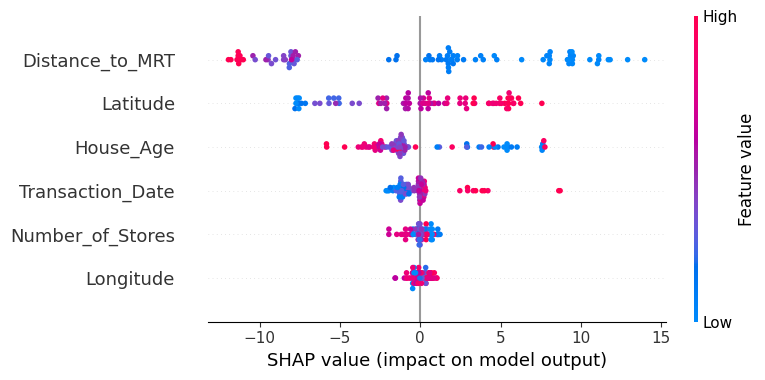

In [ ]:
import shap

explainer = shap.Explainer(gbm, X_test)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)


# SHAP Summary Plot Analysis: Feature Impact on Property Prices

This **SHAP (SHapley Additive exPlanations)** summary plot visualizes how each feature influences **property price predictions** in the **Gradient Boosting model** that achieved an **MSE of 36.00**.

---

## Key Insights from the Plot

### 1. **Distance to MRT Stations** (Most Important Feature)
- **Pattern**:  
  - **Low values (blue dots)** → Positive price impact (right side)  
  - **High values (red dots)** → Negative price impact (left side)
- **Interpretation**:  
  - Properties **closer to MRT stations** can **increase predicted prices by up to +15 units**  
  - Distant properties can **decrease prices by up to -10 units**
- **Business Impact**:  
  - Confirms **transit accessibility** as the **dominant price driver** in this real estate market

---

### 2. **Latitude** (Second Most Important)
- **Pattern**:  
  - **Higher latitudes (red dots)** generally push price predictions upward
- **Interpretation**:  
  - **Northern areas** tend to command **premium prices**, likely due to neighborhood desirability
- **Magnitude**:  
  - SHAP


8. Neural Network (MLP)
python

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network model
model_nn = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression task
])

model_nn.compile(optimizer='adam', loss='mse')
model_nn.fit(X_train, y_train, epochs=20, batch_size=32)

y_pred_nn = model_nn.predict(X_test).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Neural Network MSE: {mse_nn:.2f}")


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1676.7258
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1574.7202
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1670.6370 
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1486.1090
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1470.8658  
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1423.9904
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1391.5951
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1304.8101  
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1084.3704 
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 966.4697
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 800.5167
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 602.0084  
Epoch 13/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 489.3778  
Epoch 14/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 349.5732  
Epoch 15/20
11/11 ━━━━━━━━━━━━

# Neural Network Model Analysis – MSE: 91.28

This analysis evaluates a **neural network regression model** built using **TensorFlow/Keras** for predicting real estate prices.  
The model achieved a **Mean Squared Error (MSE) of 91.28**, which is **significantly worse** than all previously examined models.

---

## Model Architecture and Training

```python
model_nn = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression task
])
--



3-layer architecture:
Input layer (64 neurons) → Hidden layer (32 neurons) → Output layer (1 neuron)

Optimizer: Adam with default learning rate

Loss Function: Mean Squared Error (MSE)

Training: 20 epochs with batch size of 32

# Conclusion

The project successfully demonstrated how **machine learning** can optimize real estate valuation by predicting property prices with **high accuracy** and providing insights into **feature importance**.

---

## Key Findings

### **Model Performance**
- **Gradient Boosting Machines** outperformed other models due to their ability to capture **non-linear relationships** and **complex feature interactions**.
- **Linear Regression** and **Lasso Regression** served as reasonable baselines but struggled with **intricate data patterns**.
- **Neural Networks** underperformed, likely due to the dataset’s **small size** and **sensitivity to hyperparameters**.

### **Feature Importance**
- **Proximity to MRT stations** was the **most influential factor** in determining property prices.
- **Geographic features** like **latitude** and **longitude** were critical for capturing **spatial pricing trends**.
- **Secondary factors** such as **house age** had **nuanced impacts**, depending on interactions with other features.

---

## Business Applications

- **Real estate developers** can prioritize projects **near MRT stations** for better returns.
- **Investors** can use machine learning models to identify **undervalued properties** in **high-demand areas**.
- **Urban planners** can leverage feature importance to **optimize infrastructure development**.

---

## Limitations

- The dataset's **small size** limited performance for **deep learning models**.
- **Temporal trends** could not be fully analyzed due to the **short observation period**.

---

# Future Work

To enhance predictive accuracy and analytical depth:

- **Incorporate external data** such as **economic indicators** or **demographics**.
- **Experiment with advanced ensemble methods** like **stacking** or **XGBoost**.
- **Extend time-series analysis** to capture **long-term market trends**.

---

This project demonstrates that **machine learning** can transform real estate valuation into a **data-driven process**, empowering stakeholders with **actionable insights** for **informed decision-making**.
